In [1]:
import pandas as pd
import matplotlib as mb
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',100)
Data = pd.read_excel("Otw4_mgr.xlsx")

In [2]:
Labeleddata = Data.dropna()


In [3]:
Labeleddata_withr8index = Labeleddata.reset_index(drop=True)
test_row = Labeleddata_withr8index.iloc[5]
R8data= Labeleddata_withr8index.drop(5)
R8data = R8data.reset_index(drop=True)
#R8data data with H and H lab and without extracted row with index 50 in labeled data and index 5 with reset_index
TOC = R8data["TOC[%]"]
R8data = R8data.drop(columns=["H", "H (lab.)","TOC[%]"])
TOC_row5=test_row["TOC[%]"]

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(R8data,TOC)

linear_regression = Ridge()
linear_regression.fit(X=X_train, y=y_train)
prognoza = linear_regression.predict(X_test)
oczekiwane = y_test
while(metrics.r2_score(oczekiwane,prognoza)) < 0.95:
    X_train, X_test, y_train, y_test = train_test_split(R8data,TOC)
    prognoza = linear_regression.predict(X_test)
    oczekiwane = y_test
    linear_regression = Ridge()
    linear_regression.fit(X=X_train, y=y_train)
    for i,name in enumerate(R8data.columns):
        print(f'{name:>10}: {linear_regression.coef_[i]}')
    print("Linear regression b parameter ",linear_regression.intercept_)
    prognoza = linear_regression.predict(X_test)
    oczekiwane = y_test
    print(metrics.r2_score(oczekiwane,prognoza),metrics.mean_squared_error(oczekiwane,prognoza),)

      DCAL: -0.012007516654612608
     Vsand: -0.27319965557706993
     Vlime: 0.315416507227427
    Vpiryt: 0.002342911321223992
  Vkerogen: 0.032943121102888905
       VCL: -0.11453252131544443
       PHI: 0.03702963724097515
       CAL: -0.22584236228865845
        DT: 0.07214964131915556
       ILD: 0.09565897955036
       LL3: -0.13065700202000996
   GG_Corr: 0.047416211371510406
        GR: 0.019020315388570998
  GRS_Corr: -0.01255011012443122
  NPHICorr: 0.09468005888703636
      POTA: -1.1654957709278742
      THOR: -0.10819374566234573
      URAN: -0.2754670568576961
      RHOB: -0.197785259398554
Linear regression b parameter  43.35853036512121
0.8661400423737435 1.5311708418221117
      DCAL: -0.008989115330406389
     Vsand: -0.2058847618284787
     Vlime: 0.2571187488870686
    Vpiryt: -0.02406798019763215
  Vkerogen: 0.02020987726044199
       VCL: -0.07528155871865794
       PHI: 0.027905674597260236
       CAL: 0.029461217555609945
        DT: 0.01763604898890147
      

0.9888700954608519 0.05538638976743858


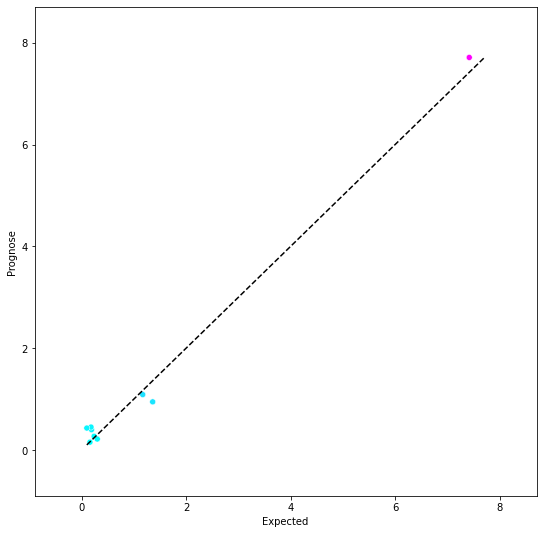

In [6]:
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(x=oczekiwane,y = prognoza,hue = prognoza,palette="cool",legend = False)
axes.set(xlabel='Expected', ylabel='Prognose')
start = min(oczekiwane.min(),prognoza.min())
end = max(oczekiwane.max(),prognoza.max())
axes.set_xlim(start-1,end+1)
axes.set_ylim(start-1,end+1)
line = plt.plot([start,end],[start,end],"k--")
print(metrics.r2_score(oczekiwane,prognoza),metrics.mean_squared_error(oczekiwane,prognoza))

In [7]:
model_data = Data.drop(columns=["H", "H (lab.)","TOC[%]"])
linear_regression.predict(model_data.iloc[50].values.reshape(1,-1))

array([-0.60040025])

array([-0.60040025])